In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.utils import shuffle
%matplotlib inline

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
#get images and labels . normalize rgb values . 
X = mnist.data[:70000]/255.
Y = mnist.target[:70000]

In [5]:
X[4440]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

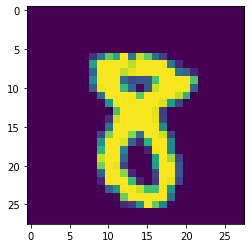

In [7]:
plt.imshow(X[4440].reshape(28,28))

In [8]:
x = [ex for ex,ey in zip(X,Y) if ey=='1' or ey=='8']
y = [1 if ey=='1' else -1 for ex,ey in zip(X,Y) if ey== '1' or ey =='8']
len(x), len(y)

(14702, 14702)

In [9]:
#shuffle
x,y = shuffle (x,y,random_state=10)

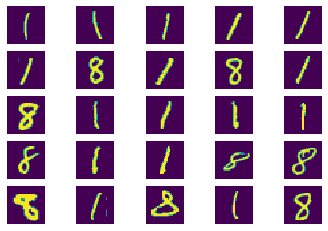

In [10]:
#show some images
plt.figure(1)
for i in range(1,26):
    ax = plt.subplot(5,5,i)
    ax.axis('off')
    if y[i] == 1:
        ax.imshow(x[i].reshape(28,28))
    else:
        ax.imshow(x[i].reshape(28,28))
plt.show()

In [11]:
#split to train & test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.28, random_state=42)
len(x_train),len(x_test),len(y_train), len(y_test)

(10585, 4117, 10585, 4117)

In [12]:
#training
m = len(x_train)
d = len(x_train[0]) #784 
eta = 0.1 #learning rate
w  = np.zeros((d,))
T = 20000
for t in range(0,T):
    i = random.randint(0,m-1)
    y_hat =np.sign(np.dot(w,x_train[i]))
    if y_hat *y_train[i] <=0 :
        w = w +eta *y_train[i]*x_train[i]
w_perceptron = w
M_perceptron = 0

In [13]:
#test and evaluation
for t in range(len(x_test)):
    y_hat = np.sign(np.dot(w_perceptron,x_test[t]))
    if y_test[t] == y_hat:
        M_perceptron = M_perceptron +1
print ("perceptron accuracy = " + str(float(M_perceptron)/len(x_test)) +" %")

perceptron accuracy = 0.9812970609667233 %


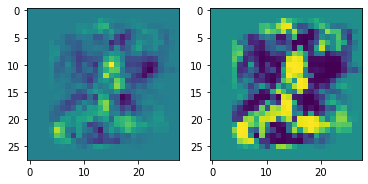

In [14]:
# show the mask learnt by Perceptron
ax1 = plt.subplot(1,2,1);
ax2 = plt.subplot(1,2,2);
ax1.imshow(w_perceptron.reshape(28,28))

tmp = 1/(1+np.exp(-10*w_perceptron/w_perceptron.max()));
ax2.imshow(tmp.reshape(28,28))
plt.show()